In [ ]:
#importing the dataset
import cv2, os

In [ ]:
from zipfile import ZipFile 
file_name = "/content/drive/My Drive/Colab Notebooks/dataset-20200918T033738Z-001.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipping: 
    # printing all the contents of the zip file 
    zipping.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zipping.extractall() 
    print('Done!') 

In [ ]:
data_path = 'dataset'
categories = os.listdir(data_path)
labels = [ i  for  i in  range(len(categories))]

#Creating the dict
label_dict = {'with mask':0, 'without mask':1}

print(label_dict)
print(labels)
print(categories)

{'with mask': 0, 'without mask': 1}
[0, 1]
['without mask', 'with mask']


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)


In [ ]:
from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

Model Creation

In [ ]:
data = np.load('data.npy')
target = np.load('target.npy')

(1376, 100, 100, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout,Activation
from tensorflow.keras.layers import Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((1100, 100, 100, 1), (1100, 2))

In [ ]:

history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=50,validation_split=0.2,batch_size=64)

Epoch 1/50
14/14 [==============================] - 1s 45ms/step - loss: 0.0257 - accuracy: 0.9909 - val_loss: 0.1150 - val_accuracy: 0.9727
Epoch 2/50
14/14 [==============================] - 1s 43ms/step - loss: 0.0154 - accuracy: 0.9989 - val_loss: 0.1310 - val_accuracy: 0.9773
Epoch 3/50
14/14 [==============================] - 1s 43ms/step - loss: 0.0074 - accuracy: 0.9989 - val_loss: 0.1177 - val_accuracy: 0.9727
Epoch 4/50
14/14 [==============================] - 1s 43ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.1332 - val_accuracy: 0.9773
Epoch 5/50
14/14 [==============================] - 1s 43ms/step - loss: 0.0122 - accuracy: 0.9955 - val_loss: 0.1330 - val_accuracy: 0.9773
Epoch 6/50
14/14 [==============================] - 1s 43ms/step - loss: 0.0141 - accuracy: 0.9977 - val_loss: 0.1170 - val_accuracy: 0.9727
Epoch 7/50
14/14 [==============================] - 1s 43ms/step - loss: 0.0083 - accuracy: 0.9989 - val_loss: 0.1111 - val_accuracy: 0.9727
Epoch 8/50
14

In [ ]:
model.save(filepath='/content/drive/My Drive/Colab Notebooks/Face_Mask_detection.h5')

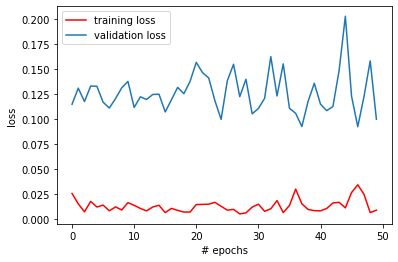

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

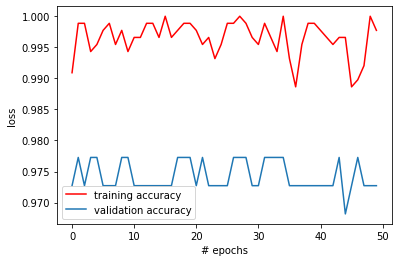

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(X_test,y_test))

9/9 [==============================] - 0s 13ms/step - loss: 0.2937 - accuracy: 0.9565
[0.29372841119766235, 0.95652174949646]
